<img src="logo.png" width="200">

<center> <h1>Linear Regression with Gradient Descent Using a Made Up Example</h1> </center>


## Gradient descent algorithm
From our [video](https://youtu.be/fkS3FkVAPWU) on linear regression, we derived the equation to update the linear model parameters as:    


\begin{equation}
\theta^{+} = \theta^{-} + \frac{\alpha}{m} (y_{i} - h(x_{i}) )\bar{x}
\end{equation}

This minimizes the following cost function

\begin{equation}
J(x, \theta, y) = \frac{1}{2m}\sum_{i=1}^{m}(h(x_i) - y_i)^2
\end{equation}

where
\begin{equation}
h(x_i) = \theta^T \bar{x}
\end{equation}

### Batch gradient descent
```FOR j FROM 0 -> max_iteration: 
    FOR i FROM 0 -> m: 
        theta += (alpha / m) * (y[i] - h(x[i])) * x_bar
    ENDLOOP
ENDLOOP
```

### Stochastic gradient descent
```shuffle(x, y)
FOR i FROM 0 -> m:
    theta += (alpha / m) * (y[i] - h(x[i])) * x_bar  
ENDLOOP
```

In [154]:
import numpy as np
import matplotlib.pyplot as plt

In [155]:
"""Generate data"""
true_slope = 10.889
true_intercept = 3.456
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 500.0 * np.random.rand(len(input_var))

In [156]:
import pandas as pd





def hypothesis(theta,x):
    h =np.matmul(theta,x)
    return h




def normalize(x, min, max):
    new = ((x - min) / (max - min))
    return new

df=pd.read_csv("Advertising.csv")
data=np.array(df)

# 1. Pre-­‐processing:

minValues = np.amin(data, axis=0)[1:5]
maxValues = np.amax(data, axis=0)[1:5]

min_TV, min_Radio, min_News, min_Sales = minValues
max_TV, max_Radio, max_News, max_Sales = maxValues

# min-max normalization

for i in range(200):
    data[i][1] = normalize(data[i][1], min_TV, max_TV)
    data[i][2] = normalize(data[i][2], min_Radio, max_Radio)
    data[i][3] = normalize(data[i][3], min_News, max_News)
    #data[i][4] = normalize(data[i][4], min_Sales, max_Sales)

# 2. Creating test and training set
train_data = np.copy(data[:-10])
test_data = np.copy(data[-10:])

# 3. Gradient descent
theta0 = -1
theta1 = -0.5
theta = np.array([[theta0, theta1]])

alpha = 0.01
max_iter = 500

#train TV x Sales
x_train = train_data[:,[1]]
y_train = train_data[:,[4]]
x_test = test_data[:,[1]]
y_test = test_data[:,[4]]

m=X.shape[0] #no.of training data items
x_train = x_train.reshape(x_train.shape[0])
y_train = y_train.reshape(x_train.shape[0])
x_test = x_test.reshape(x_test.shape[0])
y_test = y_test.reshape(x_test.shape[0])


In [157]:
inp=x_train.reshape(X.shape[0])

out=y_train.reshape(y.shape[0])
out

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

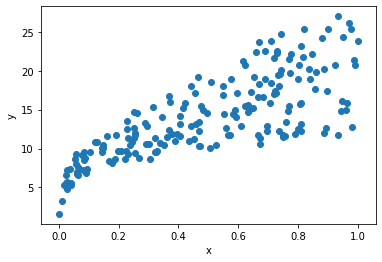

In [158]:
%matplotlib inline
plt.figure()
plt.scatter(x_train, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
input_var=inp
output_var=out

In [159]:
def compute_cost(input_var, output_var, params):
    "Compute linear regression cost"
    num_samples = len(input_var)
    cost_sum = 0.0
    for x,y in zip(input_var, output_var):
        y_hat = np.dot(params, np.array([1.0, x]))
        cost_sum += (y_hat - y) ** 2
    
    cost = cost_sum / (num_samples * 2.0)
    
    return cost

In [160]:
def lin_reg_batch_gradient_descent(input_var, output_var, params, alpha, max_iter):
    """Compute the params for linear regression using batch gradient descent""" 
    iteration = 0
    num_samples = len(input_var)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter])
    
    while iteration < max_iter:
        cost[iteration] = compute_cost(input_var, output_var, params)
        params_store[:, iteration] = params
        
        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        print(f'params: {params_store[:,iteration]}')
        
        for x,y in zip(input_var, output_var):
            y_hat = np.dot(params, np.array([1.0, x]))
            gradient = np.array([1.0, x]) * (y - y_hat)
            params += alpha * gradient/num_samples
            
        iteration += 1
    
    return params, cost, params_store
    

In [161]:
"""Train the model"""


params_0 = np.array([-1, -0.5])

alpha_batch = 0.01
max_iter = 500
params_hat_batch, cost_batch, params_store_batch =\
    lin_reg_batch_gradient_descent(x_train, y_train, params_0, alpha_batch, max_iter)



--------------------------
iteration: 0
cost: 131.21723360204115
params: [-1.  -0.5]
--------------------------
iteration: 1
cost: 128.13051004273436
params: [-0.84786135 -0.41213891]
--------------------------
iteration: 2
cost: 125.12087931984537
params: [-0.69766973 -0.3253213 ]
--------------------------
iteration: 3
cost: 122.18641401932886
params: [-0.54940062 -0.23953407]
--------------------------
iteration: 4
cost: 119.3252349177995
params: [-0.40302981 -0.15476431]
--------------------------
iteration: 5
cost: 116.53550977762505
params: [-0.25853341 -0.07099926]
--------------------------
iteration: 6
cost: 113.81545217214392
params: [-0.1158878   0.01177368]
--------------------------
iteration: 7
cost: 111.16332034025716
params: [0.02493032 0.09356696]
--------------------------
iteration: 8
cost: 108.57741606965901
params: [0.16394395 0.17439285]
--------------------------
iteration: 9
cost: 106.0560836079888
params: [0.30117583 0.25426349]
--------------------------
itera

In [162]:
params_store_batch[:,-1]

array([10.11311862,  8.26630796])

In [163]:
def lin_reg_stoch_gradient_descent(input_var, output_var, params, alpha):
    """Compute the params for linear regression using stochastic gradient descent"""
    num_samples = len(input_var)
    cost = np.zeros(num_samples)
    params_store = np.zeros([2, num_samples])
    
    i = 0
    for x,y in zip(input_var, output_var):
        cost[i] = compute_cost(input_var, output_var, params)
        params_store[:, i] = params
        
        print('--------------------------')
        print(f'iteration: {i}')
        print(f'cost: {cost[i]}')
        
        
        y_hat = np.dot(params, np.array([1.0, x]))
        gradient = np.array([1.0, x]) * (y - y_hat)
        params += alpha * gradient/num_samples
        
        i += 1
            
    return params, cost, params_store

In [164]:
alpha = 0.01
params_0 = np.array([-1, -0.5])

params_0 = np.array([-1, -0.5])

alpha_batch = 0.01
max_iter = 500
params_hat, cost, params_store =\
lin_reg_stoch_gradient_descent(x_train, y_train, params_0, alpha)

--------------------------
iteration: 0
cost: 131.21723360204115
--------------------------
iteration: 1
cost: 131.18982864119928
--------------------------
iteration: 2
cost: 131.17979337852796
--------------------------
iteration: 3
cost: 131.17120493066602
--------------------------
iteration: 4
cost: 131.15060488488996
--------------------------
iteration: 5
cost: 131.13514178534479
--------------------------
iteration: 6
cost: 131.12842484553593
--------------------------
iteration: 7
cost: 131.116888265299
--------------------------
iteration: 8
cost: 131.10258610320685
--------------------------
iteration: 9
cost: 131.09783608745897
--------------------------
iteration: 10
cost: 131.08449285167603
--------------------------
iteration: 11
cost: 131.07567968716134
--------------------------
iteration: 12
cost: 131.05426658371087
--------------------------
iteration: 13
cost: 131.04565600095788
--------------------------
iteration: 14
cost: 131.03526365860182
----------------------

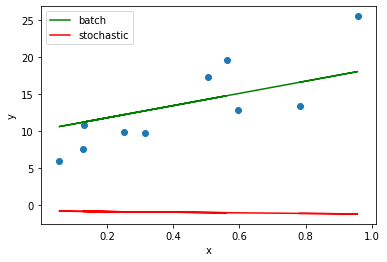

batch      T0, T1: 10.11140635641853, 8.270188794335478
stochastic T0, T1: -0.8478613477732426, -0.41213891057517743
batch rms:      3.9086332147827605
stochastic rms: 15.400833218345593


In [165]:
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, params_hat_batch[0] + params_hat_batch[1]*x_test, 'g', label='batch')
plt.plot(x_test, params_hat[0] + params_hat[1]*x_test, '-r', label='stochastic')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(f'batch      T0, T1: {params_hat_batch[0]}, {params_hat_batch[1]}')
print(f'stochastic T0, T1: {params_hat[0]}, {params_hat[1]}')
rms_batch = np.sqrt(np.mean(np.square(params_hat_batch[0] + params_hat_batch[1]*x_test - y_test)))
rms_stochastic = np.sqrt(np.mean(np.square(params_hat[0] + params_hat[1]*x_test - y_test)))
print(f'batch rms:      {rms_batch}')
print(f'stochastic rms: {rms_stochastic}')

In [166]:
params_store[:,-1]

array([-0.84825995, -0.41216317])

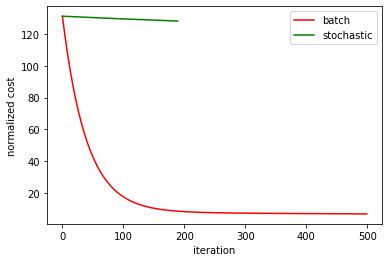

min cost with BGD: 6.628249653388475
min cost with SGD: 128.13674742367968


In [167]:
plt.figure()
plt.plot(np.arange(max_iter), cost_batch, 'r', label='batch')
plt.plot(np.arange(len(cost)), cost, 'g', label='stochastic')
plt.xlabel('iteration')
plt.ylabel('normalized cost')
plt.legend()
plt.show()
print(f'min cost with BGD: {np.min(cost_batch)}')
print(f'min cost with SGD: {np.min(cost)}')